# Homework #5 (Due 10/15/2020, 11:59pm)
## Hierarchical Models and the Theory of Variational Inference

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2020**

**Name:**

**Students collaborators:**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Description: Understanding EM and Variational Inference

In this problem, we will draw concrete connections between EM and variational inference by applying both methods to a certain class of latent variable models. You'll need to refer to relevant lecture notes on the derivations of EM and the derivation of the variational inference objective. This is an essay question that requires you to engage with complex derivations at a productive but still high level. No implementation is required.

#### Non-Bayesian Latent Variable Model
Recall the class of latent variable models we studied in lecture:
<img src="fig/graphical_model.jpg" style="height:150px;">

#### Bayesian Latent Variable Model
A Bayesian version of the same class of models involve adding priors for the model parameters:
<img src="fig/bayesian_model.jpg" style="height:150px;">

1. **(Comparing ELBOs)** For the above type of Bayesian latent variable model, write down the ELBO for variational inference with a mean field variational family. Compare the variational inference ELBO for the Bayesian model to the expectation maximization ELBO for the non-Bayesian model. What are the differences and similarities between these two ELBOs?

  In both EM and variational inference we optimize the ELBO. Compare the update steps in EM to the update steps in Coordinate Ascent Variational Inference, draw a concrete analogy between them.
  
  ***Hint:*** To make both ELBO's comparable, make sure that both are in terms of $z, y, \theta, \phi$.
  <br><br>
  
2. **(Comparing ELBOs and KL-divergences)** Recall that the original objective of variational inference is to minimize a KL-divergence, we rewrote the objective to be that of maximizing the ELBO. Why is directly minimizing the KL-divergence in the original objective difficult (be specific about wherein the difficulty lies)? 

  In the derivation of the E-step of EM, we reframed an maximization of the ELBO problem as a minimization of a KL-divergence problem. In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximize (use the instantiation of the E-step for Gaussian Mixture Models in Lecture 7 to help support your answer)? 

  In the notes for Lecture 8, we introduce a way to maximize the variational inference ELBO -- through coordinate ascent. In the derivation of the updates for coordinate ascent, there is a place where we reframed an maximization of the ELBO problem as an equivalent minimization of a KL-divergence problem. Write down the exact form of this equivalence (the two expressions are separated in the derivation by a bunch of lines, you'll need to identify both parts that you need). In this case, why was the KL-divergence easier to minimize and the ELBO harder to maximization (use the instantiation of the update for Gaussian Mixture Models in Lecture 8 to help support your answer)?

  Based on this analysis, can you draw some general conclusions about when we'd prefer to minimize the KL-divergence versus when we'd prefer to maximize the ELBO?<br><br>

3. **(The Mean Field Assumption and Coordinate Ascent)**  Describe exactly when and how the mean field assumption is used in the derivation of the coordinate ascent updates. <br><br>

4. **(Generalizability of CAVI)** Summarize what kind of derivations/math is needed in order instantiate Coordinate Ascent Variational Inference (CAVI) for a given new model (look at what we did for Gaussian Mixture Models in Lecture 8 and predict what you'd need to do for a new model). Based on this, discuss the potential draw backs of using CAVI for Bayesian inference in general. Do these draw backs mean that variational inference is not a practical method of inference? What problem(s) need to be solved in order to make variational inference easy to implement for any given Bayesian model?

5. **(Generalizability of EM)** Summarize what kind of derivations/math is needed in order instantiate Expectation Maximization (EM) for a given new model (look at what we did for Gaussian Mixture Models in Lecture 9 and predict what you'd need to do for a new model). Based on this, discuss the potential draw backs of using EM for MLE inference in general. Do these draw backs mean that EM is not a practical method of inference? What problem(s) need to be solved in order to make EM easy to implement for any given latent variable model?
 

#### 1. Comparing ELBOs for Non-Bayesian and Bayesian Latent Models + Context and Story-Telling

##### For the Non-Bayesian model

In the frequentist approach, we try to find the parameters (distribution's hyperparameters and latent variables) maximizing the log-likelihood of the $\textbf{observed data}$.
$$
max_{\theta, \phi}log[\mathbb{E}_{z \sim p(z|\theta)}{p(y|z, \phi)}]
$$
Since we can not directly optimize over $\theta$, we introduce an auxiliary distribution $q$ and use Jensen inequality. The ELBO appears as a lower bound for our optimization problem. 

We have:
$$
ELBO(\theta, \phi, q) = \mathbb{E}_{z \sim q(z)}{log[\frac{p(y|z, \phi)p(z|\theta)}{q(z)}]} = \mathbb{E}_{z \sim q(z)}{log[\frac{p(y, z| \theta, \phi)}{q(z)}]}
$$
Therefore, the ELBO is a ratio of a total likelihood by an unknown distribution we need to optimize on.

An interesting property of the ELBO in the frequentist approach is that it is an unconditional (on $q$) lower bound, meaning that we will optimize on the original parameters $\theta$ and $\phi$ but also on the auxiliary distribution $q$. This is done via the $\textbf{Expectation-Maximization (EM) algorithm}$. 


The result of this coordinate-wise update is that : 
- The E step: The unknown $q$ distribution is set as equal to the posterior distribution $p(z|y, \theta, \phi)$. This might be a difficult step, since in our model we specified the distribution of $p(y|z)$ (which is the point of introducing latent variables). In this tep, we therefore need to use the Bayes theorem, but this time we do need to work on getting the normalization constant of the resulting ratio. 
- The M-step: an Maximum Likelihood optimization problem. This problem might become complicated when the shape of the log-likelihood is not easy to optimize, or the space is a complicated one. 

##### For the Bayesian model

In the Bayesian world, we give up on estimating the posterior distribution  of unknown variables (priors' parameters + latent variables). We have understood that even when do not inserting priors on latent variables, the E step from the EM algorithm is too difficult. So what we say is that the posterior $p(z, \theta, \phi |y) = q(\psi|\lambda)$ for a family of unknown distributions $q(.|\lambda) \in \mathcal{Q}$. We further assume that all distributions in $\mathcal{Q}$ verify the mean-field assumption. And now we try to find the best element of $\mathcal{Q}$, meaning the closest to our posterior $p(z, \theta, \phi |y)$. The KL divergence therefore appears as a $\textbf{tool}$ to measure distribution's similarity. We then tweak the KL divergence and end up with an optimization problem on the ELBO, being: 
$$
ELBO(q_\lambda) = \mathbb{E}_{(\theta, \phi, z) \sim q(\theta, \phi, z|\lambda)}{log[\frac{p(y, \theta, \phi, z)}{q(\theta, \phi, z|\lambda)}]} = _{Mean-Field Asuumption} \mathbb{E}_{(\theta, \phi, z) \sim q(\theta|\lambda)q(\phi|\lambda)q(z|\lambda)}{log[\frac{p(y, \theta, \phi, z)}{q(\theta, \phi, z|\lambda)}]}
$$
For the Bayesian Model, the ELBO does not appear as a lower bound on the objective but as $\textbf{the objective function }$we wish to maximize: no approximation in the optimization part. We also optimize the ELBO function in a coordinate-wise fashion (on the $\lambda$ parameter since functions of $\mathcal{Q}$ are entirely defined by $\lambda$), and this time the algorithm is called CAVI (Coordinate Ascent Variational Inference). This consists of updating the $\lambda$ parameter for each element of our parameter vector $(\theta, \phi, z)$. 

For each step, our distribution will be $$q(\textit{parameter}_i|\lambda_i) \propto exp(\mathbb{E}_{\textit{other parameters} \sim q(\textit{distributions})}{log[p(\textit{parameter}_i, \textit{data}|\textit{other parameters})]})$$

##### Similarities between ELBOs

Both ELBOs are computed as expectancies of a log of the ratio of likelihoods. Both expectancies are computed according to the unobserved parameters following a law depending on a distribution we are optimizing on.

Both numerators of ratios are expressed as joint distributions over all the random variables of our problem : $y$ and $z$ in the frequentist approach and$y$, $z$, $\theta$, $\phi$ in the Bayesian approach.

Both denominators of ration are expressed as a likelihood of a distribution we are optimizing on. Furthermore, for both ELBOs, this distribution only depends on the non-observed quantities. For the Bayesian, it is the distribution of the variational family, computed on Bayesian priors (non observed) and latent variable, and for the frequentist ELBO it is only the non-observed latent variable.


##### Differences between ELBOs

The only major conceptual difference I can see between the two ELBOs is that for the ELBO of the Bayesian Latent Variable model, the expectancy is computed over a more complicated distribution, which is computed via a joint distribution over all the unobserved quantities in our mdoel. 


##### Similarities between update steps

For the MLE lower-bound estimation (frequentist approach), there are two steps: optimizing first on the Expectancy (ie maximizing over the distribution $q$) and optimizing over the set of parameters (parameters for both distributions: data|latent and latent variables). 

The E step for the ELBO: 
$$
argmax_{q, z \sim q(z)} ELBO(\theta^*, \phi^*, q)
$$
For the Bayesian Latent Variable model, the same kind of behavior occurs: let us say that we have already optimized for the first set of two parameters (Bayesian parameters $\theta$ and $\phi$). Then the next step of our CAVI is :
$$
argmax_{q, z \sim q(z|\lambda)} ELBO(q_{\lambda})
$$
Therefore, in both updates, there is an E step where we do optimize the ELBO iteratively over the unknown distribution of interest $q$. There is even a similarity towards the objective of the E step for both algorithms:
- For the EM algorithm, in the E step, we say that our unknown distribution is equal to the posterior with updated parameters (therefore, we are refining our approximation of the posterior)
- For the CAVI algorithm, q encodes already the posterior (the best we can in regards of our family $\mathcal{Q}$) and we try to opitmize it with our current set of parameters

However, there is no M step for the CAVI (fundamentally different: we are looking for distributions for the Bayesian Latent variable model whereas we are looking for MLE point-estimates for the Maximum Likelihood Estimation Latent Variable model).

#### 2. On ELBOs and KL-divergences

##### The KL-divergence and the Bayesian Latent variable model
In the Variational inference, our initial problem was to find a distribution $q \in \mathcal{Q}$ that would approximate well our posterior. We chose the family $\mathcal{Q}$ as distributions being dependent on the sole parameter $\lambda$ and expressed the fit of a proposal distribution $q$ by the divergence with the posterior, resulting in the optimization problem:
$$
argmin_{\lambda}{D_{KL}(q(\psi|\lambda)||p(\psi|Data))}
$$
What is unknown here ? The posterior $p(\psi|Data)$! The whole point of our work is trying to estimate the posterior so we can't compute the Kullback-Leither Divergence and therefore cannot optimize it since, at this point, we have no information on it.

##### The KL-divergence and the Frequentist Latent variable model

In the ML Latent variable approach, we leveraged the use of the KL-divergence in order to access directly to the shape of the distribution $q$ optimized. The KL divergence allowed us to have a close form for the $q$ distribution without performing any optimization. Furthermore, performing optimization over $q$ on the E-step would be untractable since we could not commute the gradient operator and the expectancy. Therefore, introducing the KL divergence allowed us to find the optimizer of the E-step and reduce the computations (there is still work in order to express the form of $q$!). 

The use of KL here is extraordinary, without even knowing the shape of the distribution $q$, I can assess that I will find the absolute minimum of the KL divergence only based on the second term (the posterior), that I should be more comfortable with. 

##### The KL-divergence and CAVI algorithm

In the CAVI algorithm, we use the ELBOand leverage the joint distributions in order to work with iterated expectancies. Through these iterated expectancies, we will be able to dissociate the effects of every unknown random variable on the data and iteratively update their posteriors. 

The KL-divergence is used when stating that, with $\psi = (\theta, \phi, z)$ : 
$$
max_{\lambda}\mathbb{E}_{(\theta, \phi, z) \sim q(\theta, \phi, z|\lambda)}{log[\frac{p(y, \theta, \phi, z)}{q(\theta, \phi, z|\lambda)}]} = max_{\lambda} \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda)}\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda)}log[\frac{p(\psi, Data)}{q(\psi|\lambda)}]
$$
Then , we separate the optimization problems for every $\lambda$ and leverage the KL divergence by showing that our problem is equivalent to 
$$
max_{\lambda_i} \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda)}\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda)}log[\frac{p(\psi_i, Data|\psi_{-i})}{q(\psi|\lambda)}] = min_{\lambda_i}D_{KL}(q(\psi_i|\lambda_i)||zexp(\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda)}{log(p(\psi_i,Data|\psi_{-i}))}))
$$
Once again, the KL-divergence allows us to express the posterior $p(\psi_i|\lambda)$ as a distribution depending on distributions we have already computed, without making any optimization, without computing any gradient.  

##### General Rule-of-Thumb of when to use KL vs when to use the ELBO

Based on the used we made earlier, I would say that we prefer using the ELBO to transform a problem involving the posterior when we cannot access it. The ELBO will transform the posterior into a joint distribution. The ELBO is also used when we try to optimize on parameters and not on distributions. On the other hand, we will try to optimize on distributions and that the posterior is known at our step of computation, we will leverage the KL divergence in order to express our unknown distribution as a known distribution since we can optimize the KL divergence when only knowing one out of the two distributions.

#### 3. On the utility of the Mean Field Assumption

In the derivation of the coordinate ascent updates, we write that: 
$$
\mathbb{E}_{\psi \sim q(\psi|\lambda)}log[\frac{p(\psi, Data)}{q(\psi|\lambda)}] = \int_{\psi_i}\int_{\psi_{-i}}log[\frac{p(\psi, Data)}{q(\psi|\lambda)}]q(\psi|\lambda)d\psi_id\psi_{-i}
$$
At this point, we need the Mean Field assumption to separate the effects of every parameter (priors, latent) which are the $\psi_i$.
$$
\int_{\psi_i}\int_{\psi_{-i}}log[\frac{p(\psi, Data)}{q(\psi|\lambda)}]q(\psi_i|\lambda)q(\psi_{-i}|\lambda)d\psi_id\psi_{-i} = \mathbb{E}_{\psi_i \sim q(\psi_i|\lambda)}\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda)}log[\frac{p(\psi, Data)}{q(\psi|\lambda)}]
$$
And we conclude by showing that this problem is equivalent to the KL Divergence we wrote in question 2.

#### 4. On the practical tractability of CAVI
FOr a given new model, we need to derive by hand the distributions 
$$
exp(\mathbb{E}_{\psi_{-i} \sim q(\psi_{-i}|\lambda)}{log(p(\psi_i,Data|\psi_{-i}))})
$$
This need to be done for every parameter of our problem: every parameter involved in the Bayesian priors, and every latent variable. We have seen from the GMM example that deriving the distribution for one parameter is hard: we need to identify which variables we will be interested in, which we won't. We also need to take the expectancy over maybe fancy distributions for the other variables. Last, we need to identify the shape of the $q$ distribution for this parameter of interest and this involves being quite comfortable with agebra in order to spot efficiently the parameters of he resulting distribution: this is hard work.

Using CAVI for Bayesian Inference may be complicated or intractable or being the source of uncountable mistakes leading to evaluate the wrong posterior. 

Variational Inference is a splendid idea, and the fact that CAVI seems intractable does not affect VI. Indeed, CAVI is our algorithm of inference, not our method of inference (VI). We can therefore think of another way to estimate these parameters after having leveraged VI. 

Generic Variational Inference: compute the gradient of the ELBO of the Bayesian Latent Variable model. 
#### 5. On the practical tractability of EM

In order to instantiate E for a new model, there are several things we need to do: 
- For the E-step, we need to work on a posterior that might be intractable : difficult
- For the M-step, we need to optimize a joint log-likelihood over several potentially constrained parameters: sometimes difficult. 

Therefore, EM in real-life is complicated and might be intractable. Furthermore, once we are done with EM, we are not even done with optimizing the log-likelihood of our observed data! We know we found a stationnary point of the Log-likelihood of the oserved data, but we know from our optimization refresher that stationnary point does not mean global optima: we have not yet solved our MLE inference. EM is practical method of inference, or at least more practical than CAVI. 

In order to make EM Easy to implement for any given latent variable model, we might want once again to compute the gradient over the expectancy (this would allow us to need insert $q$ and optimize over concrete parameters of our frequentist model.

# Problem Description: Modeling Kidney Cancer Data
In this problem, we will continue to work with the US Kidney Cancer Data set, `kcancer.csv`. This is a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

**In this homework, we focus on comparing different types of models for this data set.**


## Part I: Empirical Bayes
Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-county and $\theta_j$ be the underlying kidney cancer rate for that county. The following is a Bayesian model for our data:
\begin{aligned}
y_j | \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

1. **(Visualize the raw cancer rates)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. What can you say about the counties with the highest and lowest raw cancer rates.<br><br>

2. **(Empirical Bayes)** Using Empirical Bayes and moment matching, choose values for the hyperparameters $\alpha, \beta$ based on your data. Use these values of $\alpha$ and $\beta$ to obtain posterior distributions for each county.

***Hint:*** You'll first need to derive the fact that the ***evidence*** for a Poisson-Gamma model has a Negative Binomial distribution.<br><br>

3. **(Justification for Empirical Bayes)** Explain why, in this case, it is not a good idea to pick arbitrary values for $\alpha$ and $\beta$ for the gamma prior and proceed with Bayesian inference. Use properties of the cancer dataset to back up your explanation (i.e. it's not *always* problemmatic to choose hyperparameters of the prior arbitrarily, why is it problemmatic for this dataset).<br><br>

4. **(Posterior Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the posterior mean cancer rate estimates vs the county population size, highlight these means in green. 

  Using the scatter plot, explain why using the posterior means (from our model) to estimate cancer rates is preferable to studying the raw rates themselves.

#### 1. Preliminary EDA

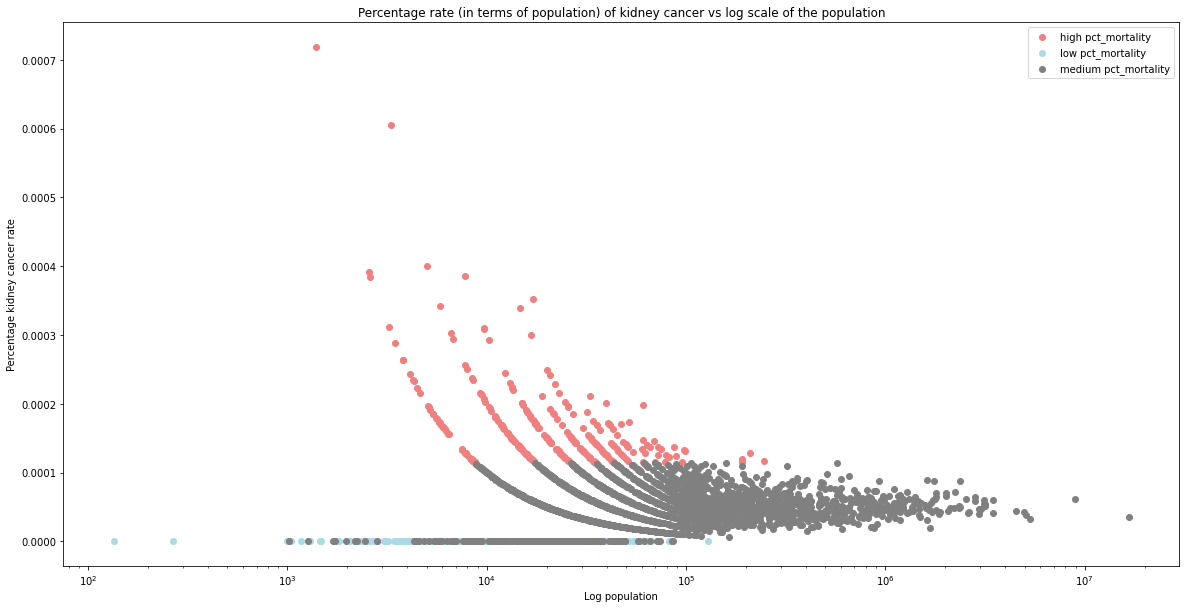

In [2]:
data = pd.read_csv('kcancer.csv')
data.sort_values(by='pct_mortality', ascending=False, inplace=True)
X = data['pop']
y = data['pct_mortality']
plt.figure(figsize=(20, 10))
plt.scatter(X[:300], y[:300], color='lightcoral', label='high pct_mortality')
plt.scatter(X[-300:], y[-300:], color='lightblue', label='low pct_mortality')
plt.scatter(X[300:-300], y[300:-300], color='gray', label='medium pct_mortality')
plt.xlabel('Log population')
plt.ylabel('Percentage kidney cancer rate')
plt.xscale('log')
plt.title('Percentage rate (in terms of population) of kidney cancer vs log scale of the population')
plt.legend()
plt.show()

According to the vizualisation we made above, we can see one key point: the extreme values in the percentage rate of kindey cancer cases are reported for the counties with the lowest population. This may mean that there is a bias or misfunctioning in the way we compute these kidney cancer rates, depending on the population size of the county.

#### 2. Using Empirical Bayes and Moment Matching method

First, a small context on this method. We set up a Bayseian Model with priors on the parameters $\theta$. We know that since we have only the prior on $\theta$, the influence of the hyperparameters $\alpha$ and $\beta$ will be significant. Furthermore, we may know that the influence of priors will be more significant when we have poor data. This is the case here where some counties have a very low percentage of kidney cancer rate.

Therefore, we are looking for suited priors, meaning that having selected the prior's distribution, we want to find some good hyperparameters to encode our prior knowledge. In order to do so, two solutions: we can either leverage a hierarchical model and put some priors on $\alpha$ and $\beta$ and attenuate the effect of the final hyperparameters on the model, or we can direcrtly estimate $\alpha$ and $\beta$ via Empirical-Bayes. Some may say that, in order to perform Empirical Bayes, we are looking into the data and therefore violating the assumptions of the prior, but one could argue that leveraging Empirical-Bayes is equivalent to performing MAP for $\alpha$ and $\beta$ when inserting Uniform priors on $\alpha$ and $\beta$.

Therefore, the problem we are trying to solve in Empirical Bayes is maximizing the evidence:
$$
max_{\alpha, \beta} p(y_1, ...., y_n|\alpha, \beta) = \prod_{i=1}^n{p(y_i|\alpha, \beta)}
$$

Let us try to derive anatycally the evidence:
$$
p(y_i|\alpha, \beta) = \int_{\theta}p(y_i, \theta|\alpha, \beta)d\theta =  \int_{\theta}p(y_i | \theta, \alpha, \beta)p(\theta| \alpha, \beta)d\theta =  \int_{\theta}p(y_i | \theta)p(\theta| \alpha, \beta)d\theta
$$
We have 
$$
p(y_i | \theta)p(\theta| \alpha, \beta) = e^{-5n_i\theta_i}\frac{(5n_i\theta_i)^{y_i}}{y_i!}\frac{\beta^{\alpha}\theta_i^{\alpha-1}e^{-\beta\theta_i}}{\Gamma(\alpha)} = e^{-\theta_i(5n_i+\beta)}\frac{\theta_i^{\alpha+y_i-1}(5n_i)^{y_i}\beta^{\alpha}}{\Gamma(\alpha)y_i!}
$$

Therefore, 
$$
p(y_i|\alpha, \beta) = \frac{(5n_i)^{y_i}\beta^{\alpha}}{\Gamma(\alpha)y_i!}\int_{\theta}\theta_i^{\alpha+y_i-1} e^{-\theta_i(5n_i+\beta)}d\theta = \frac{(5n_i)^{y_i}\beta^{\alpha}}{\Gamma(\alpha)y_i!(5n_i+\beta)^{\alpha+y_i}}\int_t{t^{\alpha+y_i}e^{-t}dt} = \frac{(5n_i)^{y_i}\beta^{\alpha}\Gamma(\alpha + y_i)}{\Gamma(\alpha)y_i!(5n_i+\beta)^{\alpha+y_i}} = \frac{\Gamma(\alpha + y_i)}{\Gamma(\alpha)y_i!}(\frac{5n_i}{5n_i+\beta})^{y_i}(\frac{\beta}{5n_i+\beta})^{\alpha}
$$

Therefore $y_i|\alpha, \beta \sim $ Negative Binomial distribution with parameters $(\alpha, \frac{\beta}{5n_i+\beta})$

Now, we could in theory analytically solve our optimization problem. However, this would be a difficult problem and maybe the evidence might be intractable or difficult to optimize over $\alpha$ and $\beta$. We therefore wish to be lazy and will use the Method of Moments for Empirical Bayes.

This consists of saying that, according to our computations, 
$$
\mathbb{E}[y_i/\alpha, \beta] = \frac{\alpha\frac{5n_i}{5n_i+\beta}}{\frac{\beta}{5n_i+\beta}} = 5n_i\frac{\alpha}{\beta}
$$
$$
\mathbb{V}[y_i/\alpha, \beta] = \frac{\alpha\frac{5n_i}{5n_i+\beta}}{(\frac{\beta}{5n_i+\beta})^2} = 5n_i(5n_i+\beta)\frac{\alpha}{\beta^2}
$$

Now, thanks to our dataset, we will estimate both quantities (the expectancy and the variance) using the Law of Large numbers. For the sake of simplicity, we will only work with simple estimates while keeping in mind that such estimates will have a variance and that we could control this variance via Variance Reduction (Importance Sampling, Control Variates, Stratification).

Now, we have 
$$\mathbb{E}[y/\alpha, \beta] = \frac{\alpha\frac{5n}{5n+\beta}}{\frac{\beta}{5n+\beta}} = 5n\frac{\alpha}{\beta}$$
$$
\mathbb{V}[y/\alpha, \beta] = \frac{\alpha\frac{5n}{5n+\beta}}{(\frac{\beta}{5n+\beta})^2} = 5n(5n+\beta)\frac{\alpha}{\beta^2} = (\frac{5n}{\beta}+1)\mathbb{E}[y/\alpha, \beta]
$$
$$
\beta = 5n\frac{\mathbb{E}[y/\alpha, \beta]}{\mathbb{V}[y/\alpha, \beta]-\mathbb{E}[y/\alpha, \beta]}
$$
$$
\alpha = \frac{\mathbb{E}[y/\alpha, \beta]\beta}{5n}
$$
Where n is the averge population

In [18]:
y_studied = data['dc']
expectancy = np.mean(y_studied)
variance = np.sum((y_studied - expectancy)**2)/(len(y_studied)-1)
n_bar = np.mean(X)
beta = 5*n_bar*expectancy/(variance-expectancy)
alpha = expectancy*beta/(5*n_bar)

Now that we have estimated the hyperparameters $\alpha$ and $\beta$ thanks to Empirical Bayes, we can sample $\theta_j$ and plug it into the posterior $y|\theta_j$ to obtain posterior distributions for each county.

In [4]:
import itertools
N = len(X)
estimated_rates = []  #they are sorted by descending empirical perc
for _ in itertools.repeat(None, N):
    theta_j = np.random.gamma(alpha, 1/beta)
    estimated_rates.append(theta_j)

In [12]:
y_post = []
for i, theta in enumerate(estimated_rates):
    y_js = []
    # compute the mean of 100 consecutive estimates
    for p in range(100):
        y_js.append(np.random.poisson(5*X[i]*theta))
    y_post.append(np.mean(y_js)/(5*X[i]))

#### 3. Justification of Empirical Bayes

In [6]:
print(len(y[y==0])/len(y))

0.16543527144233858


For this dataset, we model the $y_j$ using several counties: we have categorical distributions. Therefore, the data that is important is the raw kidney cancer rates for every county.
We know that the effect of a prior will be higher when less data is available, and that in presence of a great amount of data, the posterior will converge towards the MLE. However, here, there are many ciuntries were very small data is available (16% of thecounties have litteraly no data available). Therefore, the prior will have a significant impact on the posterior. Hence, we might want to choose the hyperparameters of the prior very carefully,  and EMpirical Bayes might be a (lazy) way to do so. 

#### 4. Using raw cancer rates vs using Posterior mean cancer estimation

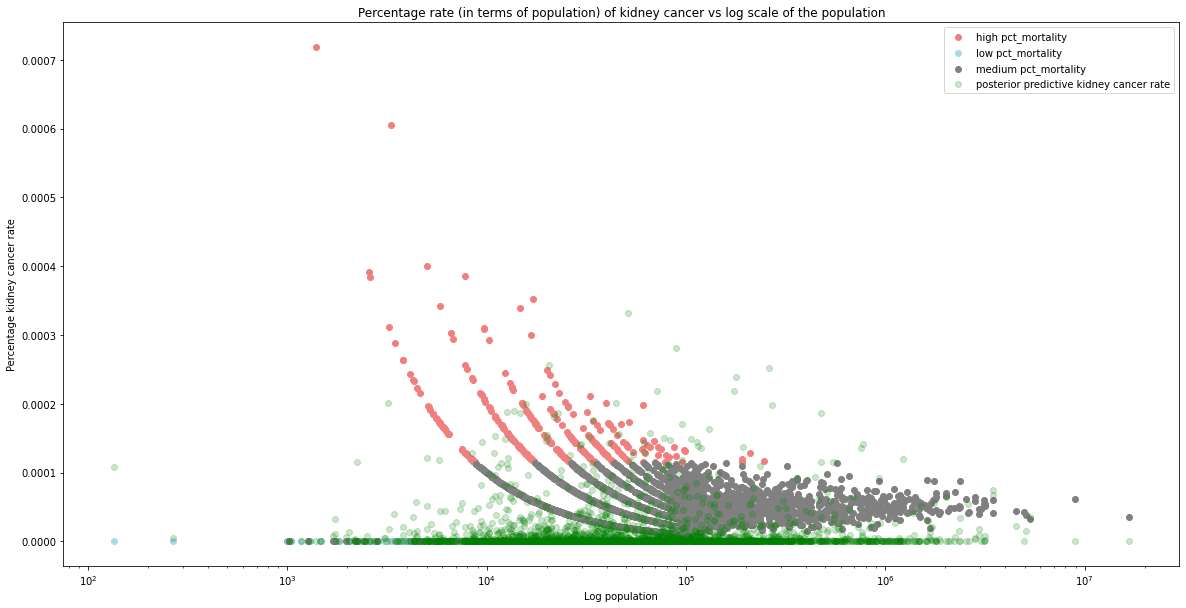

In [13]:
data['posterior'] = y_post
data.sort_values(by='pct_mortality', ascending=False, inplace=True)
X = data['pop']
y = data['pct_mortality']
y_post_plot = data['posterior']
plt.figure(figsize=(20, 10))
plt.scatter(X[:300], y[:300], color='lightcoral', label='high pct_mortality')
plt.scatter(X[-300:], y[-300:], color='lightblue', label='low pct_mortality')
plt.scatter(X[300:-300], y[300:-300], color='gray', label='medium pct_mortality')
plt.scatter(X, y_post_plot, color='green', label='posterior predictive kidney cancer rate', alpha=0.2)
plt.xlabel('Log population')
plt.ylabel('Percentage kidney cancer rate')
plt.xscale('log')
plt.title('Percentage rate (in terms of population) of kidney cancer vs log scale of the population')
plt.legend()
plt.show()

We can see that, thanks to inserting priors on the parameters of the underlying cancer rate, we prevented the values from being polarized to extreme values. Therefore, in this context, we prevented the MLE from overfitting our data and produced shrinkage to more 'centered' values for the estimated posterior of the cancer rates.

However, one weakness of our model is that it assumes that all the $\theta_j$ follow the same law $Gamma(\alpha, \beta)$ for the same $\alpha$ and $\beta$, which reduce the possible differences between counties. Therefore, in the following, we will define a hierarchical model for estimated the posterior cancer rates, which circumvent the problems with the arbitrary choice of $\alpha$ and $\beta$.

## Part II: Hierarchical Bayes
Rather than choosing fixed constants for the hyperparameters $\alpha, \beta$, following the Bayesian philosophy, we typically put additional priors on quantities of which we are uncertain. That is, we model the kidney cancer rates using a ***hierarchical model***:

\begin{aligned}
y_j| \theta_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j | \alpha, \beta &\sim Ga(\alpha, \beta), \quad j = 1, \ldots, N\\
\alpha &\sim Ga(a, b)\\
\beta &\sim Ga(c, d)
\end{aligned}
where $a, b, c, d$ are hyperparameters. 

1.  **(Posterior Marginal Means)** Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size (in log scale). Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot again, scatter plot the mean of the posterior marginal distribution over $\theta_j$, i.e. $p(\theta_j|y_1, \ldots, y_N)$, vs the county population size (in log scale), highlight these means in orange. 

  You should use `pymc3` to sample from the posterior. Compare `pymc3`'s sampler with your sampler from the previous homework, what is the difference (if any) in the performance of these samplers?<br><br>

2.  **(Hierarchical Bayes vs Empirical Bayes)** Compare the shrinkage of the posterior marginal means of the hierarchical model to the shrinkage of the posterior means from the Bayesian model with empirical Bayes estimates for $\alpha, \beta$. What is the difference in shrinkage between the full hierarchical model and the Bayesian model with empirical Bayes?

#### 1. Posterior Marginal Means

##### Simulation of $y_j$ from the Hierarchical model using pymc3

First, we will use the same hyperparameters for $a$, $b$, $c$ and $d$ as the ones we used during HW4.

In [8]:
a, b, c, d = 9, 6, 9, 0.00001

In [30]:
import pymc3 as pm
from pymc3 import model_to_graphviz, Model


bayesian_model = pm.Model()
# define hierarchical model in pymc3
with Model() as bayesian_model: 
    #prior on alpha
    alpha = pm.Gamma('alpha_pm', alpha=a, beta=b, shape=len(data))
    #prior on beta 
    beta = pm.Gamma('beta_pm', alpha=c, beta=d, shape=len(data))
    #priors on theta
    theta = pm.Gamma('theta_pm', alpha=alpha, beta=beta, shape=len(data))
    #convert rate into number of disease incidents
    #likelihood
    y_obs = pm.Poisson('y_pm', mu=theta * 5 * X.values, observed=y)


Now, let us visualize the Hierarchical model we just created. 

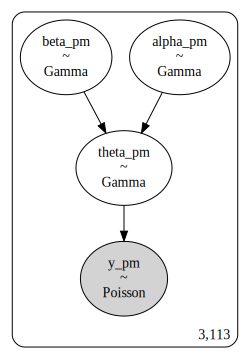

In [31]:
model_to_graphviz(bayesian_model)

So, as expected, we are creating a Hierarchical model, with 3.113 dimension, which is what is expected (we create a model for every county). Now, we will sample from the posterior. We will use the default sampler from pymc3, which is the NUTS. We will try to extract 10000 samples, burn the first 2000 and perform thinning of 10. 
We could tune these values, with auto-correlation plots. We will check a posteriori if these values seem fine.

In [ ]:
with bayesian_model:
    #using default sampler
     trace = pm.sample(len(data), tune=len(data)) 

The output won't load (the waiting time is expected to sthg like 127 hours). Although I got to work on this part with my students collab